<a href="https://colab.research.google.com/github/letien2106/TMDU/blob/main/demo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/letien2106/TMDU.git

Cloning into 'TMDU'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 12 (delta 2), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/Vietnam-Macroeconomic-Data-Fix.xls')

In [ ]:
a= df = df.T

In [ ]:
df = df.rename(columns={'index': 'Year',
                        0: 'GDP',
                        1: 'Unemployment'})

In [ ]:
df = df.reset_index().iloc[1:].rename(columns={'index':'Year'})

In [ ]:
df.replace('no data', np.NaN)
df.head(15)

,Year,GDP,Unemployment
1,1980,27.847,no data
2,1981,13.875,no data
3,1982,18.405,no data
4,1983,27.726,no data
5,1984,48.177,no data
6,1985,14.999,no data
7,1986,33.873,no data
8,1987,42.045,no data
9,1988,23.234,no data
10,1989,6.293,no data


In [ ]:
year = df['Year'].iloc[:10]

In [ ]:
year

1     1980
2     1981
3     1982
4     1983
5     1984
6     1985
7     1986
8     1987
9     1988
10    1989
Name: Year, dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 1 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          39 non-null     object
 1   GDP           39 non-null     object
 2   Unemployment  39 non-null     object
dtypes: object(3)
memory usage: 1.0+ KB


# Feature Engineering

    Thêm thuộc tính bằng Z-score:
    - z = (X - X.mean())/std

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler().fit(df[['GDP']])
df['GDP_Zscore'] = ss.transform(df[['GDP']])
print(df.head())

   Year     GDP Unemployment  GDP_Zscore
1  1980  27.847      no data   -0.602850
2  1981  13.875      no data   -0.825514
3  1982  18.405      no data   -0.753322
4  1983  27.726      no data   -0.604779
5  1984  48.177      no data   -0.278863


    Thêm feature bằng Min-Max scaling:
    - X_scaled = (X - [X.min()/(X.max() - X.min())])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler().fit(df[['GDP']])
df['GDP_MinMax'] = mms.transform(df[['GDP']])
print(df.head())

   Year     GDP Unemployment  GDP_Zscore  GDP_MinMax
1  1980  27.847      no data   -0.602850    0.110515
2  1981  13.875      no data   -0.825514    0.038875
3  1982  18.405      no data   -0.753322    0.062102
4  1983  27.726      no data   -0.604779    0.109894
5  1984  48.177      no data   -0.278863    0.214753


    Thêm tính năng bằng Robust scaling:
    - X_scaled = (X - X.median)/IQR

In [ ]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler().fit(df[['GDP']])
df['GDP_Robut'] = rs.transform(df[['GDP']])
print(df.head())

   Year     GDP Unemployment  GDP_Zscore  GDP_MinMax  GDP_Robut
1  1980  27.847      no data   -0.602850    0.110515  -0.077320
2  1981  13.875      no data   -0.825514    0.038875  -0.256597
3  1982  18.405      no data   -0.753322    0.062102  -0.198472
4  1983  27.726      no data   -0.604779    0.109894  -0.078873
5  1984  48.177      no data   -0.278863    0.214753   0.183536


In [ ]:
df.head(15)

,Year,GDP,Unemployment,GDP_Zscore,GDP_MinMax,GDP_Robut
1,1980,27.847,no data,-0.602850,0.110515,-0.077320
2,1981,13.875,no data,-0.825514,0.038875,-0.256597
3,1982,18.405,no data,-0.753322,0.062102,-0.198472
4,1983,27.726,no data,-0.604779,0.109894,-0.078873
5,1984,48.177,no data,-0.278863,0.214753,0.183536
6,1985,14.999,no data,-0.807601,0.044639,-0.242175
7,1986,33.873,no data,-0.506817,0.141412,0.000000
8,1987,42.045,no data,-0.376585,0.183313,0.104856
9,1988,23.234,no data,-0.676365,0.086862,-0.136510
10,1989,6.293,no data,-0.946344,0.000000,-0.353882


In [ ]:
data = df.replace('no data', np.NaN)

# Visualize use Tools

In [ ]:
!pip install ExploriPy

In [ ]:
from ExploriPy import EDA

analysis = EDA(data,title='Visualize Data')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
0it [00:00, ?it/s]

Converting Categorical Features to String...


Initiating Target Specific Analysis...
Unemployment
Generating Correlation Heatmap...


 33%|███▎      | 2/6 [00:00<00:00, 13.80it/s]

Generating Histogram...


100%|██████████| 6/6 [00:00<00:00, 11.29it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/6 [00:00<?, ?it/s]

Performing ANOVA...
Calculate the Target Distributions...
Generating Distribution Charts...


100%|██████████| 6/6 [00:01<00:00,  3.89it/s]


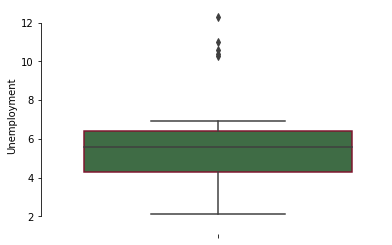

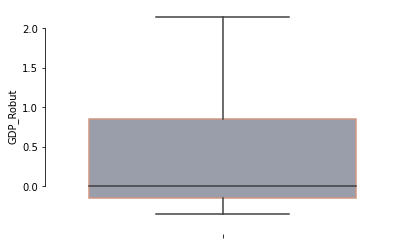

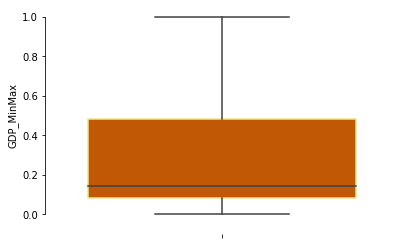

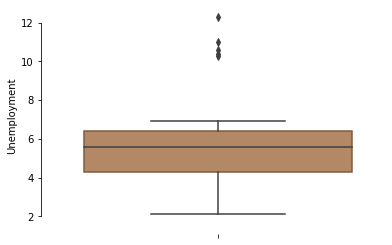

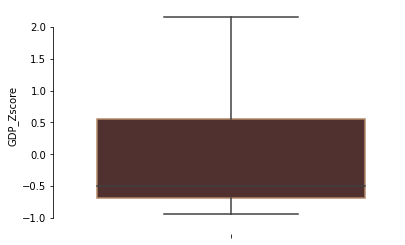

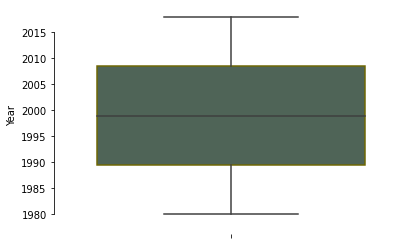

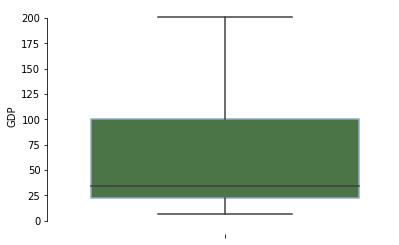

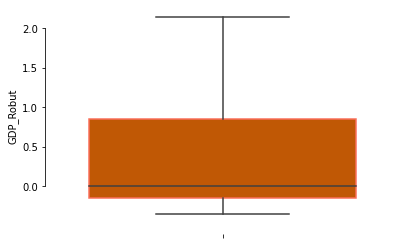

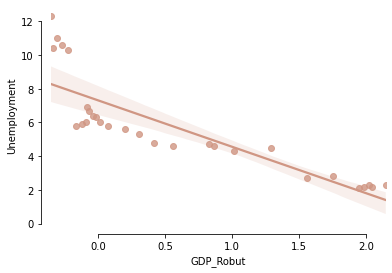

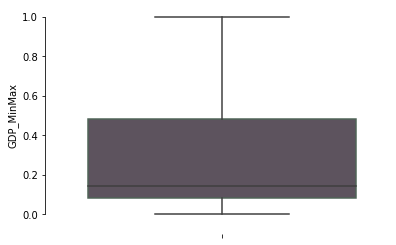

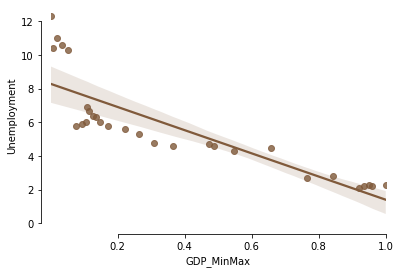

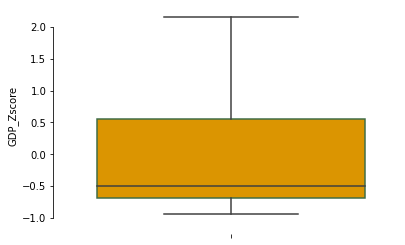

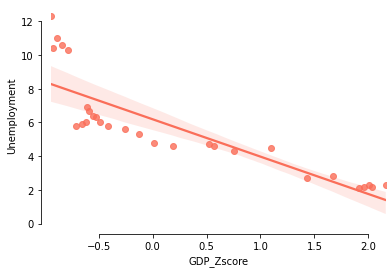

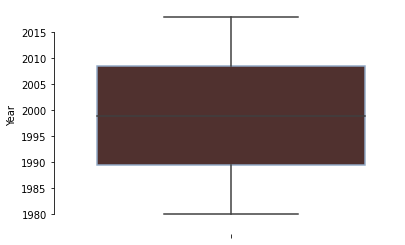

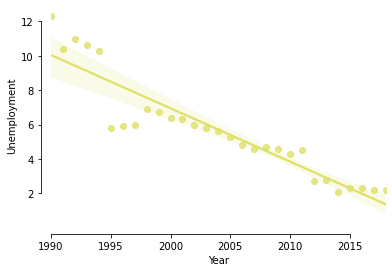

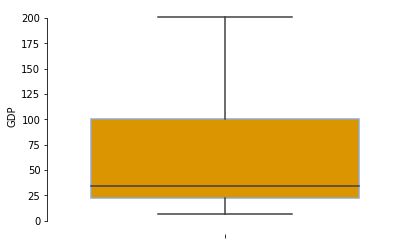

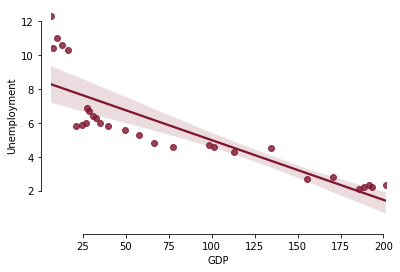

In [ ]:
analysis.TargetAnalysis('Unemployment')

In [ ]:
a.plot(figsize=(14,7))

TypeError: ignored

# Processing Data

In [ ]:
df = df.drop(columns='Year', axis=1)
df.head()

,GDP,Unemployment,GDP_Zscore,GDP_MinMax,GDP_Robut
1,27.847,no data,-0.602850,0.110515,-0.077320
2,13.875,no data,-0.825514,0.038875,-0.256597
3,18.405,no data,-0.753322,0.062102,-0.198472
4,27.726,no data,-0.604779,0.109894,-0.078873
5,48.177,no data,-0.278863,0.214753,0.183536


In [ ]:
data.head(15)

,Year,GDP,Unemployment,GDP_Zscore,GDP_MinMax,GDP_Robut
1,1980,27.847,NaN,-0.602850,0.110515,-0.077320
2,1981,13.875,NaN,-0.825514,0.038875,-0.256597
3,1982,18.405,NaN,-0.753322,0.062102,-0.198472
4,1983,27.726,NaN,-0.604779,0.109894,-0.078873
5,1984,48.177,NaN,-0.278863,0.214753,0.183536
6,1985,14.999,NaN,-0.807601,0.044639,-0.242175
7,1986,33.873,NaN,-0.506817,0.141412,0.000000
8,1987,42.045,NaN,-0.376585,0.183313,0.104856
9,1988,23.234,NaN,-0.676365,0.086862,-0.136510
10,1989,6.293,NaN,-0.946344,0.000000,-0.353882


In [ ]:
train = data[data['Unemployment'].notnull()]
test = data[data['Unemployment'].isnull()]

In [ ]:
print(train.head())

    Year     GDP  Unemployment  GDP_Zscore  GDP_MinMax  GDP_Robut
11  1990   6.472          12.3   -0.943491    0.000918  -0.351586
12  1991   7.642          10.4   -0.924845    0.006917  -0.336573
13  1992   9.867          11.0   -0.889387    0.018325  -0.308024
14  1993  13.181          10.6   -0.836574    0.035317  -0.265502
15  1994  16.312          10.3   -0.786677    0.051371  -0.225327


In [ ]:
print(test.head())

   Year     GDP  Unemployment  GDP_Zscore  GDP_MinMax  GDP_Robut
1  1980  27.847           NaN   -0.602850    0.110515  -0.077320
2  1981  13.875           NaN   -0.825514    0.038875  -0.256597
3  1982  18.405           NaN   -0.753322    0.062102  -0.198472
4  1983  27.726           NaN   -0.604779    0.109894  -0.078873
5  1984  48.177           NaN   -0.278863    0.214753   0.183536


In [ ]:
test = test.drop(columns='Unemployment', axis=1)
print(test.head())

   Year     GDP  GDP_Zscore  GDP_MinMax  GDP_Robut
1  1980  27.847   -0.602850    0.110515  -0.077320
2  1981  13.875   -0.825514    0.038875  -0.256597
3  1982  18.405   -0.753322    0.062102  -0.198472
4  1983  27.726   -0.604779    0.109894  -0.078873
5  1984  48.177   -0.278863    0.214753   0.183536


# Modeling

    Vì dữ liệu có sự hạn chế về thông tin nên bài này chúng tôi sẽ dùng Cross-Validation-Data

In [ ]:
print(train.shape, test.shape)

(29, 6) (10, 5)


In [ ]:
X = train.drop('Unemployment',axis=1)
y = train['Unemployment']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

In [ ]:
hyper_params = [{'n_features_to_select': list(range(1, 4))}]

    LinearRegression

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)

In [ ]:
model_ln = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_ln.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
y_pred_ln = model_ln.predict(X_test)
r2_ln = r2_score(y_test, y_pred_ln)
r2_ln

0.6360654677989049

    RandomForestRegression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0)

In [ ]:
model_regr = regr.fit(X_train, y_train)
rfe = RFE(model_regr)

In [ ]:
model_regr = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [ ]:
model_regr.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=RandomForestRegressor(bootstrap=True,
                                                           ccp_alpha=0.0,
                                                           criterion='mse',
                                                           max_depth=4,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           max_samples=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                        

In [ ]:
y_pred_regr = model_regr.predict(X_test)
r2_regr = r2_score(y_test, y_pred_ln)
r2_regr

0.6360654677989049

    XGBRegressor

In [ ]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

[16:05:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_xgb = model_xgb.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_xgb

0.9746124256205663

    Dự đoán trên tập test(điền no data)

In [ ]:
preds_test = model_xgb.predict(test)

In [ ]:
# xuất kết quả ra file csv
sub = pd.DataFrame(columns=["Year","Unemployment rate"])
sub["Year"] = year
sub["Unemployment rate"] = preds_test
sub.to_csv("/content/TMDU/fill-nodata.csv", index=False)